In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
import pandas as pd

train_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Show Sample

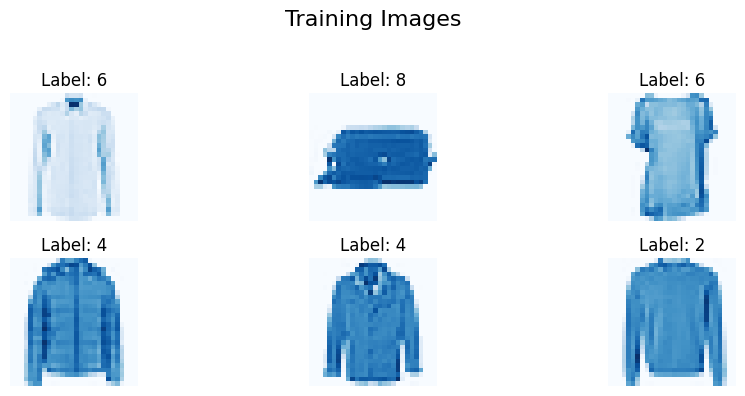

In [4]:
import matplotlib.pyplot as plt
import random

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 4))
axes = axes.flatten()

# Plot 6 random images
for i in range(6):
    random_image = random.randint(0, train_data.shape[0] - 1)  # Get a random image index
    image = train_data.iloc[random_image, 1:].values  # Pixel values
    label = train_data.iloc[random_image, 0]  # Label

    # Reshape the flat array of pixels into 28x28
    image_data = image.reshape(28, 28)

    # Display the image
    axes[i].imshow(image_data, cmap='Blues')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')  # Hide axes

# Add a super title for the figure
plt.suptitle("Training Images", size=16)

# Adjust layout to make sure titles and images fit well
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


## Dataset Exploration

In [5]:
# Training Information
print("--"*20)
print("**Training Data**")
print(f"Total Rows: {train_data.shape[0]}")
print(f"Total Features: {len(train_data.columns)}")
print(f"Inforamtion-")
print(train_data.info())
print("--"*20)

----------------------------------------
**Training Data**
Total Rows: 60000
Total Features: 785
Inforamtion-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
----------------------------------------


In [6]:
# Testing Information
print("--"*20)
print("**Testing Data**")
print(f"Total Rows: {test_data.shape[0]}")
print(f"Total Features: {len(test_data.columns)}")
print(f"Inforamtion-")
print(test_data.info())
print("--"*20)

----------------------------------------
**Testing Data**
Total Rows: 10000
Total Features: 785
Inforamtion-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None
----------------------------------------


In [7]:
# Null data
print(f"Null Values in Training Dataset - {train_data.isnull().sum().sum()}")
print(f"Null Values in Testing Dataset - {test_data.isnull().sum().sum()}")

# Duplicate data
print(f"Duplicate Values in Training Dataset - {train_data.duplicated().sum()}")
print(f"Duplicate Values in Testing Dataset - {test_data.duplicated().sum()}")

# Dropping Duplicate Data
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

Null Values in Training Dataset - 0
Null Values in Testing Dataset - 0
Duplicate Values in Training Dataset - 43
Duplicate Values in Testing Dataset - 1


In [8]:
# Define the fashion labels with corresponding numbers
label_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Get the number of unique classes
num_classes = train_data['label'].nunique()

# Get the distribution of each class
class_distribution = train_data['label'].value_counts().sort_index()

# Print the results
print(f"Number of classes: {num_classes}")
print("Class distribution:")

# Match label numbers with names and print
for label_num, count in class_distribution.items():
    print(f"{label_mapping[label_num]}: {count}")


Number of classes: 10
Class distribution:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


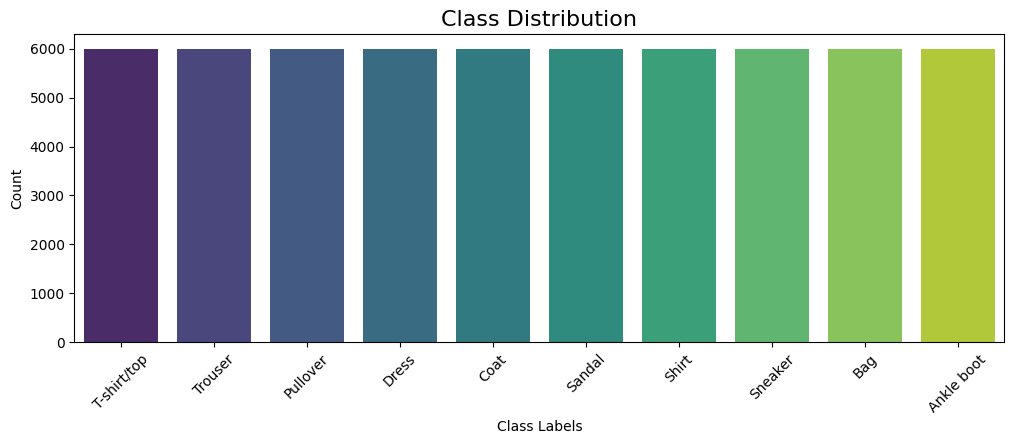

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the fashion labels (for the Fashion MNIST dataset)
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the class distribution
plt.figure(figsize=(12, 4))
sns.countplot(data=train_data, x='label', palette='viridis')

# Customize the plot
plt.title("Class Distribution", size=16)
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.xticks(range(len(labels)), labels, rotation=45)  # Map the integer labels to class names
plt.show()


## Preprocessing

In [10]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
from sklearn.model_selection import train_test_split

# Combine your train and test data (if necessary)
data = pd.concat([train_data, test_data], ignore_index=True)

# Separate features and labels
X = data.iloc[:, 1:].values  # Features (all pixel values)
y = data.iloc[:, 0].values   # Labels

# Split into train, validation, and test sets (80% train, 10% validation, 10% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, stratify=y_train_val, random_state=42)

# Reshape data to match 28x28 image format
X_train = X_train.reshape(-1, 28, 28)
X_val = X_val.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# Output the shapes of each split to verify
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (56000, 28, 28) (56000,)
Validation set shape: (7000, 28, 28) (7000,)
Test set shape: (7000, 28, 28) (7000,)


## Data Augmentation and Normalization

In [12]:
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader


# Define transformations
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
])

val_test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
])

# Custom Dataset Class
class FashionMNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images.astype(np.uint8)  # Convert to uint8 type
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Create datasets
train_dataset = FashionMNISTDataset(X_train, y_train, transform=train_transform)
val_dataset = FashionMNISTDataset(X_val, y_val, transform=val_test_transform)
test_dataset = FashionMNISTDataset(X_test, y_test, transform=val_test_transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Building a Simple Neural Network

### model beda2y

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Neural Network using sequential
class SimpleNN(nn.Sequential):
    def __init__(self):
        super(SimpleNN, self).__init__(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(256, 10),
            nn.Softmax(dim=1)
        )

# Instantiate the model, loss function, and optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training the Model

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        all_labels = []
        all_predictions = []
        
        # Add tqdm for training phase
        train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Training]")
        
        # Training phase with tqdm
        for images, labels in train_loader_tqdm:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
        
        # Calculate training metrics
        train_precision = precision_score(all_labels, all_predictions, average='macro', zero_division=0)
        train_recall = recall_score(all_labels, all_predictions, average='macro', zero_division=0)
        train_f1 = f1_score(all_labels, all_predictions, average='macro', zero_division=0)
        train_acc = sum(np.array(all_labels) == np.array(all_predictions)) / len(all_labels)

        # Validation phase with tqdm
        model.eval()
        val_loss = 0.0
        all_val_labels = []
        all_val_predictions = []
        
        val_loader_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} [Validation]", leave=False)
        with torch.no_grad():
            for images, labels in val_loader_tqdm:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                all_val_labels.extend(labels.cpu().numpy())
                all_val_predictions.extend(predicted.cpu().numpy())
        
        # Calculate validation metrics
        val_precision = precision_score(all_val_labels, all_val_predictions, average='macro', zero_division=0)
        val_recall = recall_score(all_val_labels, all_val_predictions, average='macro', zero_division=0)
        val_f1 = f1_score(all_val_labels, all_val_predictions, average='macro', zero_division=0)
        val_acc = sum(np.array(all_val_labels) == np.array(all_val_predictions)) / len(all_val_labels)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}, "
              f"Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, "
              f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.4f}, "
              f"Val Precision: {val_precision:.4f}, Val Recall: {val_recall:.4f}, Val F1: {val_f1:.4f}")


## Hyperparameter tuning

In [15]:
%%capture
!pip install optuna

In [16]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

In [17]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, activation_fn, dropout1, dropout2):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),                      # Flatten the input images
            nn.Linear(input_size, hidden_size1),  # First linear layer
            activation_fn,                     # Activation function
            nn.Dropout(dropout1),              # Dropout for regularization
            nn.Linear(hidden_size1, hidden_size2), # Second linear layer
            activation_fn,                     # Activation function
            nn.Dropout(dropout2),              # Dropout for regularization
            nn.Linear(hidden_size2, output_size), # Output layer
            nn.Softmax(dim=1)                  # Softmax activation for multi-class classification
        )

    def forward(self, x):
        return self.model(x)


In [18]:
from optuna.trial import TrialState

class TQDMProgressBar:
    def __init__(self, total_trials):
        self.pbar = tqdm(total=total_trials, desc="Optuna Trials", leave=True)

    def update(self):
        self.pbar.update(1)
        
    def close(self):
        self.pbar.close()


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import Subset
import numpy as np
from tqdm import tqdm

def get_data_loaders(dataset, subset_ratio=0.5, batch_size=64, shuffle=True):
    subset_size = int(subset_ratio * len(dataset))
    indices = np.random.choice(len(dataset), subset_size, replace=False)
    subset = Subset(dataset, indices)
    return torch.utils.data.DataLoader(subset, batch_size=batch_size, shuffle=shuffle)

def calculate_metrics(labels, preds):
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted', zero_division=1)
    recall = recall_score(labels, preds, average='weighted', zero_division=1)
    f1 = f1_score(labels, preds, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

def objective(trial):
    # Hyperparameters to optimize
    hidden_size1 = trial.suggest_int('hidden_size1', 128, 512)
    hidden_size2 = trial.suggest_int('hidden_size2', 64, 256)
    activation_name = trial.suggest_categorical('activation_fn', ['ReLU', 'Tanh', 'Sigmoid'])
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'SGD'])
    learning_rate = trial.suggest_float('lr', 1e-4, 1e-1, log=True)  # Updated
    weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-2, log=True)  # Updated
    dropout1 = trial.suggest_float('dropout1', 0.1, 0.5)  # Updated
    dropout2 = trial.suggest_float('dropout2', 0.1, 0.5)  # Updated

    # Choose activation function
    activation_fn = {
        'ReLU': nn.ReLU(),
        'Tanh': nn.Tanh(),
        'Sigmoid': nn.Sigmoid()
    }[activation_name]

    # Subset the dataset to use only 50%
    train_loader = get_data_loaders(train_dataset, subset_ratio=0.5)
    val_loader = get_data_loaders(val_dataset, subset_ratio=0.5, shuffle=False)

    # Model, Loss, and Optimizer
    model = SimpleNN(
        input_size=28*28,
        hidden_size1=hidden_size1,
        hidden_size2=hidden_size2,
        output_size=10,
        activation_fn=activation_fn,
        dropout1=dropout1,
        dropout2=dropout2
    ).to(device)

    criterion = nn.CrossEntropyLoss()

    # Optimizer selection
    optimizer = {
        'Adam': optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay),
        'SGD': optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    }[optimizer_name]

    num_epochs = 10

    for epoch in tqdm(range(num_epochs), desc="Epoch Progress"):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        # Training loop
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = correct / total

        # Validation phase
        model.eval()
        correct, total, val_loss = 0, 0, 0.0
        val_labels, val_preds = [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                val_labels.extend(labels.cpu().numpy())
                val_preds.extend(predicted.cpu().numpy())

        val_acc = correct / total

        # Calculate metrics
        val_accuracy, val_precision, val_recall, val_f1 = calculate_metrics(val_labels, val_preds)

        # Print metrics for each epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {running_loss/len(train_loader):.4f}, "
              f"Train Acc: {train_acc:.4f}, Val Loss: {val_loss/len(val_loader):.4f}, "
              f"Val Acc: {val_accuracy:.4f}, Val Precision: {val_precision:.4f}, "
              f"Val Recall: {val_recall:.4f}, Val F1: {val_f1:.4f}")

    return val_acc  # Return validation accuracy for Optuna to optimize


In [ ]:
# Set up the TQDM progress bar
n_trials = 20
tqdm_progress = TQDMProgressBar(total_trials=n_trials)

# Define a custom callback function to update the TQDM progress bar
def optuna_tqdm_callback(study, trial):
    if trial.state == TrialState.COMPLETE:
        tqdm_progress.update()

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the study with the TQDM progress bar callback
study.optimize(objective, n_trials=n_trials, callbacks=[optuna_tqdm_callback])

# Close the progress bar
tqdm_progress.close()

# Print the best trial
best_trial = study.best_trial
print(f"Best trial: {best_trial.params}")


Optuna Trials:   0%|          | 0/20 [00:00<?, ?it/s][I 2024-09-15 15:50:11,689] A new study created in memory with name: no-name-a012eeae-efc2-4544-9efc-e56684787648
/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-4, 1e-1)
/tmp/ipykernel_36/3477342388.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-2)
/tmp/ipykernel_36/3477342388.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instea

Epoch 1/10, Train Loss: 1.7536, Train Acc: 0.7174, Val Loss: 1.6874, Val Acc: 0.7754, Val Precision: 0.7142, Val Recall: 0.7754, Val F1: 0.7398



Epoch Progress:  20%|██        | 2/10 [00:46<03:05, 23.16s/it]

Epoch 2/10, Train Loss: 1.6950, Train Acc: 0.7682, Val Loss: 1.6689, Val Acc: 0.7943, Val Precision: 0.7996, Val Recall: 0.7943, Val F1: 0.7663



Epoch Progress:  30%|███       | 3/10 [01:09<02:40, 22.98s/it]

Epoch 3/10, Train Loss: 1.6693, Train Acc: 0.7943, Val Loss: 1.6417, Val Acc: 0.8196, Val Precision: 0.8193, Val Recall: 0.8196, Val F1: 0.8160



Epoch Progress:  40%|████      | 4/10 [01:32<02:17, 22.96s/it]

Epoch 4/10, Train Loss: 1.6540, Train Acc: 0.8083, Val Loss: 1.6304, Val Acc: 0.8316, Val Precision: 0.8387, Val Recall: 0.8316, Val F1: 0.8274



Epoch Progress:  50%|█████     | 5/10 [01:54<01:54, 22.91s/it]

Epoch 5/10, Train Loss: 1.6475, Train Acc: 0.8149, Val Loss: 1.6208, Val Acc: 0.8403, Val Precision: 0.8430, Val Recall: 0.8403, Val F1: 0.8371



Epoch Progress:  60%|██████    | 6/10 [02:18<01:31, 22.98s/it]

Epoch 6/10, Train Loss: 1.6439, Train Acc: 0.8182, Val Loss: 1.6290, Val Acc: 0.8314, Val Precision: 0.8322, Val Recall: 0.8314, Val F1: 0.8311



Epoch Progress:  70%|███████   | 7/10 [02:40<01:08, 22.96s/it]

Epoch 7/10, Train Loss: 1.6402, Train Acc: 0.8213, Val Loss: 1.6221, Val Acc: 0.8397, Val Precision: 0.8419, Val Recall: 0.8397, Val F1: 0.8352



Epoch Progress:  80%|████████  | 8/10 [03:03<00:45, 22.88s/it]

Epoch 8/10, Train Loss: 1.6382, Train Acc: 0.8237, Val Loss: 1.6164, Val Acc: 0.8453, Val Precision: 0.8490, Val Recall: 0.8453, Val F1: 0.8403



Epoch Progress:  90%|█████████ | 9/10 [03:26<00:22, 22.89s/it]

Epoch 9/10, Train Loss: 1.6345, Train Acc: 0.8273, Val Loss: 1.6184, Val Acc: 0.8429, Val Precision: 0.8462, Val Recall: 0.8429, Val F1: 0.8404



Epoch Progress: 100%|██████████| 10/10 [03:49<00:00, 22.95s/it]
[I 2024-09-15 15:54:01,168] Trial 0 finished with value: 0.845 and parameters: {'hidden_size1': 434, 'hidden_size2': 187, 'activation_fn': 'ReLU', 'optimizer': 'Adam', 'lr': 0.0004112886415443404, 'weight_decay': 0.00010101058378180646, 'dropout1': 0.24312644271296222, 'dropout2': 0.33662478227247183}. Best is trial 0 with value: 0.845.
Optuna Trials:   5%|▌         | 1/20 [03:49<1:12:40, 229.48s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-4, 1e-1)
/tmp/ipykernel_36/3477342388.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True

Epoch 10/10, Train Loss: 1.6313, Train Acc: 0.8310, Val Loss: 1.6154, Val Acc: 0.8450, Val Precision: 0.8488, Val Recall: 0.8450, Val F1: 0.8402



Epoch Progress:  10%|█         | 1/10 [00:22<03:25, 22.86s/it]

Epoch 1/10, Train Loss: 1.7557, Train Acc: 0.7254, Val Loss: 1.6686, Val Acc: 0.8004, Val Precision: 0.8072, Val Recall: 0.8004, Val F1: 0.7927



Epoch Progress:  20%|██        | 2/10 [00:45<03:02, 22.82s/it]

Epoch 2/10, Train Loss: 1.6912, Train Acc: 0.7771, Val Loss: 1.6639, Val Acc: 0.8003, Val Precision: 0.8093, Val Recall: 0.8003, Val F1: 0.7969



Epoch Progress:  30%|███       | 3/10 [01:08<02:39, 22.81s/it]

Epoch 3/10, Train Loss: 1.6842, Train Acc: 0.7820, Val Loss: 1.6605, Val Acc: 0.8041, Val Precision: 0.8079, Val Recall: 0.8041, Val F1: 0.7988



Epoch Progress:  40%|████      | 4/10 [01:30<02:16, 22.69s/it]

Epoch 4/10, Train Loss: 1.6818, Train Acc: 0.7838, Val Loss: 1.6647, Val Acc: 0.7971, Val Precision: 0.8014, Val Recall: 0.7971, Val F1: 0.7949



Epoch Progress:  50%|█████     | 5/10 [01:53<01:53, 22.73s/it]

Epoch 5/10, Train Loss: 1.6781, Train Acc: 0.7871, Val Loss: 1.6483, Val Acc: 0.8146, Val Precision: 0.8227, Val Recall: 0.8146, Val F1: 0.8080



Epoch Progress:  60%|██████    | 6/10 [02:16<01:30, 22.61s/it]

Epoch 6/10, Train Loss: 1.6788, Train Acc: 0.7868, Val Loss: 1.6540, Val Acc: 0.8097, Val Precision: 0.8138, Val Recall: 0.8097, Val F1: 0.8070



Epoch Progress:  70%|███████   | 7/10 [02:38<01:07, 22.59s/it]

Epoch 7/10, Train Loss: 1.6764, Train Acc: 0.7891, Val Loss: 1.6591, Val Acc: 0.8019, Val Precision: 0.8115, Val Recall: 0.8019, Val F1: 0.7924



Epoch Progress:  80%|████████  | 8/10 [03:01<00:45, 22.63s/it]

Epoch 8/10, Train Loss: 1.6737, Train Acc: 0.7916, Val Loss: 1.6446, Val Acc: 0.8191, Val Precision: 0.8268, Val Recall: 0.8191, Val F1: 0.8155



Epoch Progress:  90%|█████████ | 9/10 [03:24<00:22, 22.72s/it]

Epoch 9/10, Train Loss: 1.6723, Train Acc: 0.7934, Val Loss: 1.6401, Val Acc: 0.8223, Val Precision: 0.8218, Val Recall: 0.8223, Val F1: 0.8204



Epoch Progress: 100%|██████████| 10/10 [03:47<00:00, 22.73s/it]
[I 2024-09-15 15:57:48,436] Trial 1 finished with value: 0.8154285714285714 and parameters: {'hidden_size1': 253, 'hidden_size2': 114, 'activation_fn': 'Tanh', 'optimizer': 'Adam', 'lr': 0.0007224017077534864, 'weight_decay': 0.000591987902751564, 'dropout1': 0.48080903498617755, 'dropout2': 0.12115443211921982}. Best is trial 0 with value: 0.845.
Optuna Trials:  10%|█         | 2/20 [07:36<1:08:27, 228.18s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-4, 1e-1)
/tmp/ipykernel_36/3477342388.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..

Epoch 10/10, Train Loss: 1.6713, Train Acc: 0.7936, Val Loss: 1.6465, Val Acc: 0.8154, Val Precision: 0.8176, Val Recall: 0.8154, Val F1: 0.8145



Epoch Progress:  10%|█         | 1/10 [00:23<03:29, 23.25s/it]

Epoch 1/10, Train Loss: 1.7738, Train Acc: 0.6927, Val Loss: 1.6868, Val Acc: 0.7730, Val Precision: 0.7727, Val Recall: 0.7730, Val F1: 0.7668



Epoch Progress:  20%|██        | 2/10 [00:46<03:06, 23.25s/it]

Epoch 2/10, Train Loss: 1.7077, Train Acc: 0.7547, Val Loss: 1.6656, Val Acc: 0.7949, Val Precision: 0.8031, Val Recall: 0.7949, Val F1: 0.7857



Epoch Progress:  30%|███       | 3/10 [01:09<02:42, 23.15s/it]

Epoch 3/10, Train Loss: 1.6926, Train Acc: 0.7687, Val Loss: 1.6542, Val Acc: 0.8051, Val Precision: 0.8055, Val Recall: 0.8051, Val F1: 0.8020



Epoch Progress:  40%|████      | 4/10 [01:32<02:18, 23.00s/it]

Epoch 4/10, Train Loss: 1.6895, Train Acc: 0.7710, Val Loss: 1.6555, Val Acc: 0.8053, Val Precision: 0.8045, Val Recall: 0.8053, Val F1: 0.8001



Epoch Progress:  50%|█████     | 5/10 [01:55<01:54, 22.90s/it]

Epoch 5/10, Train Loss: 1.6872, Train Acc: 0.7726, Val Loss: 1.6589, Val Acc: 0.8004, Val Precision: 0.8097, Val Recall: 0.8004, Val F1: 0.7948



Epoch Progress:  60%|██████    | 6/10 [02:18<01:31, 22.93s/it]

Epoch 6/10, Train Loss: 1.6851, Train Acc: 0.7756, Val Loss: 1.6433, Val Acc: 0.8170, Val Precision: 0.8159, Val Recall: 0.8170, Val F1: 0.8138



Epoch Progress:  70%|███████   | 7/10 [02:40<01:08, 22.94s/it]

Epoch 7/10, Train Loss: 1.6819, Train Acc: 0.7787, Val Loss: 1.6462, Val Acc: 0.8136, Val Precision: 0.8160, Val Recall: 0.8136, Val F1: 0.8093



Epoch Progress:  80%|████████  | 8/10 [03:04<00:45, 22.97s/it]

Epoch 8/10, Train Loss: 1.6785, Train Acc: 0.7816, Val Loss: 1.6453, Val Acc: 0.8140, Val Precision: 0.8176, Val Recall: 0.8140, Val F1: 0.8105



Epoch Progress:  90%|█████████ | 9/10 [03:27<00:22, 22.99s/it]

Epoch 9/10, Train Loss: 1.6779, Train Acc: 0.7826, Val Loss: 1.6475, Val Acc: 0.8129, Val Precision: 0.8269, Val Recall: 0.8129, Val F1: 0.8057



Epoch Progress: 100%|██████████| 10/10 [03:50<00:00, 23.02s/it]
[I 2024-09-15 16:01:38,698] Trial 2 finished with value: 0.8197142857142857 and parameters: {'hidden_size1': 165, 'hidden_size2': 124, 'activation_fn': 'ReLU', 'optimizer': 'Adam', 'lr': 0.0011646836585915024, 'weight_decay': 6.776238633197255e-05, 'dropout1': 0.41802645190289056, 'dropout2': 0.44443227975201893}. Best is trial 0 with value: 0.845.
Optuna Trials:  15%|█▌        | 3/20 [11:27<1:04:55, 229.13s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-4, 1e-1)
/tmp/ipykernel_36/3477342388.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(.

Epoch 10/10, Train Loss: 1.6743, Train Acc: 0.7864, Val Loss: 1.6410, Val Acc: 0.8197, Val Precision: 0.8187, Val Recall: 0.8197, Val F1: 0.8182



Epoch Progress:  10%|█         | 1/10 [00:23<03:27, 23.04s/it]

Epoch 1/10, Train Loss: 1.7975, Train Acc: 0.6761, Val Loss: 1.7566, Val Acc: 0.7139, Val Precision: 0.7289, Val Recall: 0.7139, Val F1: 0.7110



Epoch Progress:  20%|██        | 2/10 [00:46<03:04, 23.10s/it]

Epoch 2/10, Train Loss: 1.7740, Train Acc: 0.6994, Val Loss: 1.7257, Val Acc: 0.7431, Val Precision: 0.7396, Val Recall: 0.7431, Val F1: 0.7394



Epoch Progress:  30%|███       | 3/10 [01:09<02:41, 23.12s/it]

Epoch 3/10, Train Loss: 1.7706, Train Acc: 0.7031, Val Loss: 1.7543, Val Acc: 0.7149, Val Precision: 0.7309, Val Recall: 0.7149, Val F1: 0.7102



Epoch Progress:  40%|████      | 4/10 [01:32<02:18, 23.17s/it]

Epoch 4/10, Train Loss: 1.7654, Train Acc: 0.7082, Val Loss: 1.7480, Val Acc: 0.7236, Val Precision: 0.7526, Val Recall: 0.7236, Val F1: 0.7207



Epoch Progress:  50%|█████     | 5/10 [01:55<01:55, 23.18s/it]

Epoch 5/10, Train Loss: 1.7643, Train Acc: 0.7107, Val Loss: 1.7715, Val Acc: 0.6974, Val Precision: 0.7178, Val Recall: 0.6974, Val F1: 0.6791



Epoch Progress:  60%|██████    | 6/10 [02:18<01:32, 23.16s/it]

Epoch 6/10, Train Loss: 1.7648, Train Acc: 0.7096, Val Loss: 1.7309, Val Acc: 0.7354, Val Precision: 0.7471, Val Recall: 0.7354, Val F1: 0.7247



Epoch Progress:  70%|███████   | 7/10 [02:42<01:09, 23.21s/it]

Epoch 7/10, Train Loss: 1.7619, Train Acc: 0.7130, Val Loss: 1.7335, Val Acc: 0.7371, Val Precision: 0.7551, Val Recall: 0.7371, Val F1: 0.7372



Epoch Progress:  80%|████████  | 8/10 [03:05<00:46, 23.17s/it]

Epoch 8/10, Train Loss: 1.7618, Train Acc: 0.7123, Val Loss: 1.7658, Val Acc: 0.7071, Val Precision: 0.7472, Val Recall: 0.7071, Val F1: 0.7102



Epoch Progress:  90%|█████████ | 9/10 [03:28<00:23, 23.11s/it]

Epoch 9/10, Train Loss: 1.7628, Train Acc: 0.7114, Val Loss: 1.7127, Val Acc: 0.7556, Val Precision: 0.7597, Val Recall: 0.7556, Val F1: 0.7498



Epoch Progress: 100%|██████████| 10/10 [03:51<00:00, 23.17s/it]
[I 2024-09-15 16:05:30,444] Trial 3 finished with value: 0.7577142857142857 and parameters: {'hidden_size1': 271, 'hidden_size2': 240, 'activation_fn': 'Tanh', 'optimizer': 'Adam', 'lr': 0.0033671590494716848, 'weight_decay': 0.003083870034405437, 'dropout1': 0.24484113076687658, 'dropout2': 0.40972412975834394}. Best is trial 0 with value: 0.845.
Optuna Trials:  20%|██        | 4/20 [15:18<1:01:22, 230.16s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-4, 1e-1)
/tmp/ipykernel_36/3477342388.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..

Epoch 10/10, Train Loss: 1.7599, Train Acc: 0.7156, Val Loss: 1.7142, Val Acc: 0.7577, Val Precision: 0.7638, Val Recall: 0.7577, Val F1: 0.7571



Epoch Progress:   0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  10%|█         | 1/10 [00:23<03:29, 23.28s/it]

Epoch 1/10, Train Loss: 1.8012, Train Acc: 0.6707, Val Loss: 1.7146, Val Acc: 0.7467, Val Precision: 0.6903, Val Recall: 0.7467, Val F1: 0.7118


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  20%|██        | 2/10 [00:46<03:04, 23.07s/it]

Epoch 2/10, Train Loss: 1.7433, Train Acc: 0.7213, Val Loss: 1.7057, Val Acc: 0.7569, Val Precision: 0.7019, Val Recall: 0.7569, Val F1: 0.7223



Epoch Progress:  30%|███       | 3/10 [01:09<02:43, 23.32s/it]

Epoch 3/10, Train Loss: 1.7364, Train Acc: 0.7276, Val Loss: 1.7055, Val Acc: 0.7537, Val Precision: 0.7185, Val Recall: 0.7537, Val F1: 0.7205



Epoch Progress:  40%|████      | 4/10 [01:33<02:20, 23.44s/it]

Epoch 4/10, Train Loss: 1.7302, Train Acc: 0.7339, Val Loss: 1.6885, Val Acc: 0.7751, Val Precision: 0.7792, Val Recall: 0.7751, Val F1: 0.7695



Epoch Progress:  50%|█████     | 5/10 [01:57<01:57, 23.50s/it]

Epoch 5/10, Train Loss: 1.7208, Train Acc: 0.7436, Val Loss: 1.6705, Val Acc: 0.7894, Val Precision: 0.7915, Val Recall: 0.7894, Val F1: 0.7844



Epoch Progress:  60%|██████    | 6/10 [02:20<01:33, 23.42s/it]

Epoch 6/10, Train Loss: 1.7161, Train Acc: 0.7466, Val Loss: 1.6687, Val Acc: 0.7953, Val Precision: 0.7993, Val Recall: 0.7953, Val F1: 0.7910



Epoch Progress:  70%|███████   | 7/10 [02:44<01:10, 23.57s/it]

Epoch 7/10, Train Loss: 1.7108, Train Acc: 0.7523, Val Loss: 1.6725, Val Acc: 0.7883, Val Precision: 0.7969, Val Recall: 0.7883, Val F1: 0.7867



Epoch Progress:  80%|████████  | 8/10 [03:07<00:47, 23.61s/it]

Epoch 8/10, Train Loss: 1.7104, Train Acc: 0.7532, Val Loss: 1.6631, Val Acc: 0.7967, Val Precision: 0.8024, Val Recall: 0.7967, Val F1: 0.7945



Epoch Progress:  90%|█████████ | 9/10 [03:31<00:23, 23.66s/it]

Epoch 9/10, Train Loss: 1.7084, Train Acc: 0.7547, Val Loss: 1.6619, Val Acc: 0.7987, Val Precision: 0.8016, Val Recall: 0.7987, Val F1: 0.7949



Epoch Progress: 100%|██████████| 10/10 [03:55<00:00, 23.52s/it]
[I 2024-09-15 16:09:25,642] Trial 4 finished with value: 0.7934285714285715 and parameters: {'hidden_size1': 417, 'hidden_size2': 108, 'activation_fn': 'Sigmoid', 'optimizer': 'Adam', 'lr': 0.0033519478509567904, 'weight_decay': 6.726677886495338e-05, 'dropout1': 0.4727803094794847, 'dropout2': 0.22239018535092592}. Best is trial 0 with value: 0.845.
Optuna Trials:  25%|██▌       | 5/20 [19:13<57:59, 231.98s/it]  /tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-4, 1e-1)
/tmp/ipykernel_36/3477342388.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float

Epoch 10/10, Train Loss: 1.7060, Train Acc: 0.7575, Val Loss: 1.6680, Val Acc: 0.7934, Val Precision: 0.7949, Val Recall: 0.7934, Val F1: 0.7863



Epoch Progress:   0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  10%|█         | 1/10 [00:23<03:31, 23.49s/it]

Epoch 1/10, Train Loss: 2.3019, Train Acc: 0.1000, Val Loss: 2.3009, Val Acc: 0.1124, Val Precision: 0.0687, Val Recall: 0.1124, Val F1: 0.0731


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  20%|██        | 2/10 [00:47<03:08, 23.57s/it]

Epoch 2/10, Train Loss: 2.3008, Train Acc: 0.1175, Val Loss: 2.2996, Val Acc: 0.1757, Val Precision: 0.1135, Val Recall: 0.1757, Val F1: 0.1097


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  30%|███       | 3/10 [01:10<02:44, 23.55s/it]

Epoch 3/10, Train Loss: 2.2996, Train Acc: 0.1355, Val Loss: 2.2983, Val Acc: 0.2167, Val Precision: 0.1320, Val Recall: 0.2167, Val F1: 0.1310


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  40%|████      | 4/10 [01:34<02:21, 23.52s/it]

Epoch 4/10, Train Loss: 2.2983, Train Acc: 0.1515, Val Loss: 2.2968, Val Acc: 0.2470, Val Precision: 0.1435, Val Recall: 0.2470, Val F1: 0.1453


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  50%|█████     | 5/10 [01:57<01:57, 23.47s/it]

Epoch 5/10, Train Loss: 2.2970, Train Acc: 0.1682, Val Loss: 2.2953, Val Acc: 0.2614, Val Precision: 0.1522, Val Recall: 0.2614, Val F1: 0.1526


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  60%|██████    | 6/10 [02:20<01:33, 23.37s/it]

Epoch 6/10, Train Loss: 2.2955, Train Acc: 0.1785, Val Loss: 2.2936, Val Acc: 0.2647, Val Precision: 0.1670, Val Recall: 0.2647, Val F1: 0.1535


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  70%|███████   | 7/10 [02:44<01:10, 23.38s/it]

Epoch 7/10, Train Loss: 2.2940, Train Acc: 0.1876, Val Loss: 2.2918, Val Acc: 0.2620, Val Precision: 0.1708, Val Recall: 0.2620, Val F1: 0.1505


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  80%|████████  | 8/10 [03:07<00:46, 23.36s/it]

Epoch 8/10, Train Loss: 2.2923, Train Acc: 0.1964, Val Loss: 2.2898, Val Acc: 0.2579, Val Precision: 0.1666, Val Recall: 0.2579, Val F1: 0.1462


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  90%|█████████ | 9/10 [03:30<00:23, 23.35s/it]

Epoch 9/10, Train Loss: 2.2904, Train Acc: 0.2025, Val Loss: 2.2876, Val Acc: 0.2530, Val Precision: 0.1782, Val Recall: 0.2530, Val F1: 0.1421


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress: 100%|██████████| 10/10 [03:54<00:00, 23.40s/it]
[I 2024-09-15 16:13:19,674] Trial 5 finished with value: 0.24657142857142858 and parameters: {'hidden_size1': 470, 'hidden_size2': 187, 'activation_fn': 'ReLU', 'optimizer': 'SGD', 'lr': 0.0003645933464123208, 'weight_decay': 0.00018240944273653214, 'dropout1': 0.2700079526107041, 'dropout2': 0.4395503775754783}. Best is trial 0 with value: 0.845.
Optuna Trials:  30%|███       | 6/20 [23:07<54:17, 232.68s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., lo

Epoch 10/10, Train Loss: 2.2882, Train Acc: 0.2060, Val Loss: 2.2852, Val Acc: 0.2466, Val Precision: 0.1772, Val Recall: 0.2466, Val F1: 0.1354



Epoch Progress:  10%|█         | 1/10 [00:23<03:30, 23.37s/it]

Epoch 1/10, Train Loss: 2.2930, Train Acc: 0.2002, Val Loss: 2.2781, Val Acc: 0.3676, Val Precision: 0.4548, Val Recall: 0.3676, Val F1: 0.3096


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  20%|██        | 2/10 [00:46<03:05, 23.16s/it]

Epoch 2/10, Train Loss: 2.2602, Train Acc: 0.3428, Val Loss: 2.2319, Val Acc: 0.3576, Val Precision: 0.4578, Val Recall: 0.3576, Val F1: 0.2703


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  30%|███       | 3/10 [01:09<02:42, 23.22s/it]

Epoch 3/10, Train Loss: 2.2039, Train Acc: 0.3574, Val Loss: 2.1628, Val Acc: 0.3850, Val Precision: 0.4240, Val Recall: 0.3850, Val F1: 0.2693


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  40%|████      | 4/10 [01:33<02:19, 23.31s/it]

Epoch 4/10, Train Loss: 2.1390, Train Acc: 0.3933, Val Loss: 2.1010, Val Acc: 0.4157, Val Precision: 0.4590, Val Recall: 0.4157, Val F1: 0.3038


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  50%|█████     | 5/10 [01:56<01:56, 23.35s/it]

Epoch 5/10, Train Loss: 2.0841, Train Acc: 0.4456, Val Loss: 2.0464, Val Acc: 0.4930, Val Precision: 0.4844, Val Recall: 0.4930, Val F1: 0.4091


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  60%|██████    | 6/10 [02:19<01:33, 23.34s/it]

Epoch 6/10, Train Loss: 2.0339, Train Acc: 0.5188, Val Loss: 1.9944, Val Acc: 0.5530, Val Precision: 0.5599, Val Recall: 0.5530, Val F1: 0.4730


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  70%|███████   | 7/10 [02:43<01:10, 23.35s/it]

Epoch 7/10, Train Loss: 1.9868, Train Acc: 0.5594, Val Loss: 1.9471, Val Acc: 0.5903, Val Precision: 0.5924, Val Recall: 0.5903, Val F1: 0.5263


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  80%|████████  | 8/10 [03:06<00:46, 23.24s/it]

Epoch 8/10, Train Loss: 1.9463, Train Acc: 0.5957, Val Loss: 1.9081, Val Acc: 0.6397, Val Precision: 0.6266, Val Recall: 0.6397, Val F1: 0.5834


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  90%|█████████ | 9/10 [03:29<00:23, 23.11s/it]

Epoch 9/10, Train Loss: 1.9124, Train Acc: 0.6290, Val Loss: 1.8792, Val Acc: 0.6451, Val Precision: 0.6354, Val Recall: 0.6451, Val F1: 0.5887


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress: 100%|██████████| 10/10 [03:51<00:00, 23.16s/it]
[I 2024-09-15 16:17:11,305] Trial 6 finished with value: 0.6595714285714286 and parameters: {'hidden_size1': 377, 'hidden_size2': 73, 'activation_fn': 'Tanh', 'optimizer': 'SGD', 'lr': 0.003068371450335533, 'weight_decay': 0.001422085530993321, 'dropout1': 0.20658546824353868, 'dropout2': 0.27580443728105714}. Best is trial 0 with value: 0.845.
Optuna Trials:  35%|███▌      | 7/20 [26:59<50:20, 232.33s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=T

Epoch 10/10, Train Loss: 1.8846, Train Acc: 0.6453, Val Loss: 1.8558, Val Acc: 0.6596, Val Precision: 0.6428, Val Recall: 0.6596, Val F1: 0.6132



Epoch Progress:   0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  10%|█         | 1/10 [00:22<03:23, 22.57s/it]

Epoch 1/10, Train Loss: 1.9667, Train Acc: 0.5345, Val Loss: 1.7476, Val Acc: 0.7299, Val Precision: 0.6718, Val Recall: 0.7299, Val F1: 0.6965


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  20%|██        | 2/10 [00:45<03:00, 22.55s/it]

Epoch 2/10, Train Loss: 1.7425, Train Acc: 0.7316, Val Loss: 1.7128, Val Acc: 0.7556, Val Precision: 0.6953, Val Recall: 0.7556, Val F1: 0.7205


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  30%|███       | 3/10 [01:07<02:37, 22.55s/it]

Epoch 3/10, Train Loss: 1.7160, Train Acc: 0.7535, Val Loss: 1.6958, Val Acc: 0.7713, Val Precision: 0.7114, Val Recall: 0.7713, Val F1: 0.7360


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  40%|████      | 4/10 [01:30<02:15, 22.66s/it]

Epoch 4/10, Train Loss: 1.7035, Train Acc: 0.7657, Val Loss: 1.6865, Val Acc: 0.7784, Val Precision: 0.7188, Val Recall: 0.7784, Val F1: 0.7435


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  50%|█████     | 5/10 [01:53<01:53, 22.65s/it]

Epoch 5/10, Train Loss: 1.6963, Train Acc: 0.7712, Val Loss: 1.6800, Val Acc: 0.7869, Val Precision: 0.7242, Val Recall: 0.7869, Val F1: 0.7508


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  60%|██████    | 6/10 [02:15<01:30, 22.63s/it]

Epoch 6/10, Train Loss: 1.6904, Train Acc: 0.7775, Val Loss: 1.6769, Val Acc: 0.7877, Val Precision: 0.7310, Val Recall: 0.7877, Val F1: 0.7531


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  70%|███████   | 7/10 [02:38<01:07, 22.61s/it]

Epoch 7/10, Train Loss: 1.6868, Train Acc: 0.7805, Val Loss: 1.6744, Val Acc: 0.7904, Val Precision: 0.7309, Val Recall: 0.7904, Val F1: 0.7547


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  80%|████████  | 8/10 [03:01<00:45, 22.65s/it]

Epoch 8/10, Train Loss: 1.6831, Train Acc: 0.7844, Val Loss: 1.6689, Val Acc: 0.7967, Val Precision: 0.7332, Val Recall: 0.7967, Val F1: 0.7605


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  90%|█████████ | 9/10 [03:23<00:22, 22.62s/it]

Epoch 9/10, Train Loss: 1.6810, Train Acc: 0.7864, Val Loss: 1.6681, Val Acc: 0.7960, Val Precision: 0.7371, Val Recall: 0.7960, Val F1: 0.7609


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress: 100%|██████████| 10/10 [03:46<00:00, 22.64s/it]
[I 2024-09-15 16:20:57,762] Trial 7 finished with value: 0.7995714285714286 and parameters: {'hidden_size1': 342, 'hidden_size2': 82, 'activation_fn': 'ReLU', 'optimizer': 'SGD', 'lr': 0.06190939768783542, 'weight_decay': 0.0008819675716072324, 'dropout1': 0.11549715416616002, 'dropout2': 0.14803027230977844}. Best is trial 0 with value: 0.845.
Optuna Trials:  40%|████      | 8/20 [30:46<46:05, 230.46s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=T

Epoch 10/10, Train Loss: 1.6783, Train Acc: 0.7884, Val Loss: 1.6649, Val Acc: 0.7996, Val Precision: 0.7369, Val Recall: 0.7996, Val F1: 0.7634



Epoch Progress:   0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  10%|█         | 1/10 [00:22<03:25, 22.86s/it]

Epoch 1/10, Train Loss: 2.1166, Train Acc: 0.3711, Val Loss: 1.8690, Val Acc: 0.6414, Val Precision: 0.5918, Val Recall: 0.6414, Val F1: 0.6032


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  20%|██        | 2/10 [00:45<03:03, 22.97s/it]

Epoch 2/10, Train Loss: 1.8170, Train Acc: 0.6744, Val Loss: 1.7412, Val Acc: 0.7329, Val Precision: 0.6743, Val Recall: 0.7329, Val F1: 0.6997


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  30%|███       | 3/10 [01:09<02:41, 23.04s/it]

Epoch 3/10, Train Loss: 1.7512, Train Acc: 0.7244, Val Loss: 1.7150, Val Acc: 0.7530, Val Precision: 0.6939, Val Recall: 0.7530, Val F1: 0.7188


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  40%|████      | 4/10 [01:32<02:18, 23.02s/it]

Epoch 4/10, Train Loss: 1.7293, Train Acc: 0.7424, Val Loss: 1.7054, Val Acc: 0.7596, Val Precision: 0.6981, Val Recall: 0.7596, Val F1: 0.7247


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  50%|█████     | 5/10 [01:54<01:54, 22.99s/it]

Epoch 5/10, Train Loss: 1.7177, Train Acc: 0.7516, Val Loss: 1.6956, Val Acc: 0.7690, Val Precision: 0.7082, Val Recall: 0.7690, Val F1: 0.7339


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  60%|██████    | 6/10 [02:17<01:31, 22.83s/it]

Epoch 6/10, Train Loss: 1.7090, Train Acc: 0.7594, Val Loss: 1.6909, Val Acc: 0.7727, Val Precision: 0.7108, Val Recall: 0.7727, Val F1: 0.7374


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  70%|███████   | 7/10 [02:40<01:08, 22.74s/it]

Epoch 7/10, Train Loss: 1.7032, Train Acc: 0.7650, Val Loss: 1.6860, Val Acc: 0.7790, Val Precision: 0.7187, Val Recall: 0.7790, Val F1: 0.7439


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  80%|████████  | 8/10 [03:02<00:45, 22.68s/it]

Epoch 8/10, Train Loss: 1.6992, Train Acc: 0.7681, Val Loss: 1.6851, Val Acc: 0.7784, Val Precision: 0.7186, Val Recall: 0.7784, Val F1: 0.7433


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  90%|█████████ | 9/10 [03:25<00:22, 22.73s/it]

Epoch 9/10, Train Loss: 1.6959, Train Acc: 0.7715, Val Loss: 1.6798, Val Acc: 0.7841, Val Precision: 0.7232, Val Recall: 0.7841, Val F1: 0.7487


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress: 100%|██████████| 10/10 [03:48<00:00, 22.83s/it]
[I 2024-09-15 16:24:46,030] Trial 8 finished with value: 0.7874285714285715 and parameters: {'hidden_size1': 192, 'hidden_size2': 135, 'activation_fn': 'ReLU', 'optimizer': 'SGD', 'lr': 0.03779716361032748, 'weight_decay': 0.0006335886197395606, 'dropout1': 0.10500196969198933, 'dropout2': 0.4055232013707344}. Best is trial 0 with value: 0.845.
Optuna Trials:  45%|████▌     | 9/20 [34:34<42:07, 229.78s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=T

Epoch 10/10, Train Loss: 1.6927, Train Acc: 0.7746, Val Loss: 1.6774, Val Acc: 0.7874, Val Precision: 0.7267, Val Recall: 0.7874, Val F1: 0.7519



Epoch Progress:  10%|█         | 1/10 [00:22<03:22, 22.48s/it]

Epoch 1/10, Train Loss: 2.3026, Train Acc: 0.0962, Val Loss: 2.3014, Val Acc: 0.1179, Val Precision: 0.0722, Val Recall: 0.1179, Val F1: 0.0752


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  20%|██        | 2/10 [00:45<03:00, 22.58s/it]

Epoch 2/10, Train Loss: 2.3003, Train Acc: 0.1269, Val Loss: 2.2989, Val Acc: 0.1551, Val Precision: 0.0902, Val Recall: 0.1551, Val F1: 0.0945


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  30%|███       | 3/10 [01:07<02:38, 22.60s/it]

Epoch 3/10, Train Loss: 2.2979, Train Acc: 0.1579, Val Loss: 2.2962, Val Acc: 0.1906, Val Precision: 0.1076, Val Recall: 0.1906, Val F1: 0.1179


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  40%|████      | 4/10 [01:30<02:15, 22.55s/it]

Epoch 4/10, Train Loss: 2.2953, Train Acc: 0.1847, Val Loss: 2.2934, Val Acc: 0.2129, Val Precision: 0.1383, Val Recall: 0.2129, Val F1: 0.1331



Epoch Progress:  50%|█████     | 5/10 [01:52<01:52, 22.51s/it]

Epoch 5/10, Train Loss: 2.2926, Train Acc: 0.2101, Val Loss: 2.2905, Val Acc: 0.2311, Val Precision: 0.1730, Val Recall: 0.2311, Val F1: 0.1457



Epoch Progress:  60%|██████    | 6/10 [02:15<01:30, 22.61s/it]

Epoch 6/10, Train Loss: 2.2899, Train Acc: 0.2227, Val Loss: 2.2873, Val Acc: 0.2484, Val Precision: 0.2791, Val Recall: 0.2484, Val F1: 0.1582


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  70%|███████   | 7/10 [02:38<01:08, 22.69s/it]

Epoch 7/10, Train Loss: 2.2868, Train Acc: 0.2347, Val Loss: 2.2838, Val Acc: 0.2603, Val Precision: 0.2145, Val Recall: 0.2603, Val F1: 0.1648


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  80%|████████  | 8/10 [03:01<00:45, 22.77s/it]

Epoch 8/10, Train Loss: 2.2835, Train Acc: 0.2414, Val Loss: 2.2801, Val Acc: 0.2711, Val Precision: 0.2423, Val Recall: 0.2711, Val F1: 0.1716


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  90%|█████████ | 9/10 [03:24<00:22, 22.98s/it]

Epoch 9/10, Train Loss: 2.2801, Train Acc: 0.2449, Val Loss: 2.2761, Val Acc: 0.2787, Val Precision: 0.2570, Val Recall: 0.2787, Val F1: 0.1760


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress: 100%|██████████| 10/10 [03:48<00:00, 22.81s/it]
[I 2024-09-15 16:28:34,167] Trial 9 finished with value: 0.2814285714285714 and parameters: {'hidden_size1': 340, 'hidden_size2': 138, 'activation_fn': 'Tanh', 'optimizer': 'SGD', 'lr': 0.0002989031977976571, 'weight_decay': 6.776533850792738e-05, 'dropout1': 0.3821201694687115, 'dropout2': 0.12136290409767683}. Best is trial 0 with value: 0.845.
Optuna Trials:  50%|█████     | 10/20 [38:22<38:12, 229.27s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., lo

Epoch 10/10, Train Loss: 2.2761, Train Acc: 0.2524, Val Loss: 2.2718, Val Acc: 0.2814, Val Precision: 0.2664, Val Recall: 0.2814, Val F1: 0.1775



Epoch Progress:   0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  10%|█         | 1/10 [00:23<03:30, 23.43s/it]

Epoch 1/10, Train Loss: 2.0688, Train Acc: 0.4487, Val Loss: 1.9016, Val Acc: 0.5981, Val Precision: 0.5039, Val Recall: 0.5981, Val F1: 0.5232


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  20%|██        | 2/10 [00:46<03:06, 23.35s/it]

Epoch 2/10, Train Loss: 1.8441, Train Acc: 0.6674, Val Loss: 1.7619, Val Acc: 0.7331, Val Precision: 0.6751, Val Recall: 0.7331, Val F1: 0.7000


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  30%|███       | 3/10 [01:09<02:42, 23.27s/it]

Epoch 3/10, Train Loss: 1.7548, Train Acc: 0.7340, Val Loss: 1.7259, Val Acc: 0.7509, Val Precision: 0.6908, Val Recall: 0.7509, Val F1: 0.7162


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  40%|████      | 4/10 [01:33<02:19, 23.33s/it]

Epoch 4/10, Train Loss: 1.7298, Train Acc: 0.7469, Val Loss: 1.7111, Val Acc: 0.7559, Val Precision: 0.6968, Val Recall: 0.7559, Val F1: 0.7215


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  50%|█████     | 5/10 [01:56<01:57, 23.45s/it]

Epoch 5/10, Train Loss: 1.7168, Train Acc: 0.7564, Val Loss: 1.7010, Val Acc: 0.7646, Val Precision: 0.7037, Val Recall: 0.7646, Val F1: 0.7297


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  60%|██████    | 6/10 [02:20<01:34, 23.53s/it]

Epoch 6/10, Train Loss: 1.7075, Train Acc: 0.7634, Val Loss: 1.6941, Val Acc: 0.7720, Val Precision: 0.7124, Val Recall: 0.7720, Val F1: 0.7370


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  70%|███████   | 7/10 [02:44<01:10, 23.58s/it]

Epoch 7/10, Train Loss: 1.7018, Train Acc: 0.7668, Val Loss: 1.6889, Val Acc: 0.7746, Val Precision: 0.7129, Val Recall: 0.7746, Val F1: 0.7392


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  80%|████████  | 8/10 [03:08<00:47, 23.62s/it]

Epoch 8/10, Train Loss: 1.6972, Train Acc: 0.7706, Val Loss: 1.6846, Val Acc: 0.7789, Val Precision: 0.7182, Val Recall: 0.7789, Val F1: 0.7435


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  90%|█████████ | 9/10 [03:31<00:23, 23.62s/it]

Epoch 9/10, Train Loss: 1.6925, Train Acc: 0.7748, Val Loss: 1.6805, Val Acc: 0.7830, Val Precision: 0.7222, Val Recall: 0.7830, Val F1: 0.7475


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress: 100%|██████████| 10/10 [03:55<00:00, 23.55s/it]
[I 2024-09-15 16:32:29,739] Trial 10 finished with value: 0.7845714285714286 and parameters: {'hidden_size1': 509, 'hidden_size2': 194, 'activation_fn': 'Sigmoid', 'optimizer': 'Adam', 'lr': 0.00010960596617985702, 'weight_decay': 1.0161740571534403e-05, 'dropout1': 0.33692299699140127, 'dropout2': 0.3323582439382356}. Best is trial 0 with value: 0.845.
Optuna Trials:  55%|█████▌    | 11/20 [42:18<34:40, 231.20s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(

Epoch 10/10, Train Loss: 1.6898, Train Acc: 0.7760, Val Loss: 1.6785, Val Acc: 0.7846, Val Precision: 0.7239, Val Recall: 0.7846, Val F1: 0.7490



Epoch Progress:  10%|█         | 1/10 [00:23<03:30, 23.38s/it]

Epoch 1/10, Train Loss: 1.7692, Train Acc: 0.6949, Val Loss: 1.6740, Val Acc: 0.7847, Val Precision: 0.7888, Val Recall: 0.7847, Val F1: 0.7795



Epoch Progress:  20%|██        | 2/10 [00:46<03:07, 23.43s/it]

Epoch 2/10, Train Loss: 1.7026, Train Acc: 0.7582, Val Loss: 1.6554, Val Acc: 0.8046, Val Precision: 0.8084, Val Recall: 0.8046, Val F1: 0.7983



Epoch Progress:  30%|███       | 3/10 [01:10<02:44, 23.44s/it]

Epoch 3/10, Train Loss: 1.6922, Train Acc: 0.7686, Val Loss: 1.6564, Val Acc: 0.8024, Val Precision: 0.8023, Val Recall: 0.8024, Val F1: 0.7960



Epoch Progress:  40%|████      | 4/10 [01:33<02:20, 23.41s/it]

Epoch 4/10, Train Loss: 1.6884, Train Acc: 0.7718, Val Loss: 1.6487, Val Acc: 0.8104, Val Precision: 0.8123, Val Recall: 0.8104, Val F1: 0.8072



Epoch Progress:  50%|█████     | 5/10 [01:56<01:56, 23.37s/it]

Epoch 5/10, Train Loss: 1.6876, Train Acc: 0.7726, Val Loss: 1.6598, Val Acc: 0.7997, Val Precision: 0.8056, Val Recall: 0.7997, Val F1: 0.7983



Epoch Progress:  60%|██████    | 6/10 [02:20<01:33, 23.39s/it]

Epoch 6/10, Train Loss: 1.6856, Train Acc: 0.7746, Val Loss: 1.6547, Val Acc: 0.8051, Val Precision: 0.8088, Val Recall: 0.8051, Val F1: 0.7996



Epoch Progress:  70%|███████   | 7/10 [02:43<01:10, 23.37s/it]

Epoch 7/10, Train Loss: 1.6836, Train Acc: 0.7765, Val Loss: 1.6457, Val Acc: 0.8146, Val Precision: 0.8183, Val Recall: 0.8146, Val F1: 0.8103



Epoch Progress:  80%|████████  | 8/10 [03:07<00:46, 23.34s/it]

Epoch 8/10, Train Loss: 1.6832, Train Acc: 0.7774, Val Loss: 1.6530, Val Acc: 0.8067, Val Precision: 0.8099, Val Recall: 0.8067, Val F1: 0.8056



Epoch Progress:  90%|█████████ | 9/10 [03:30<00:23, 23.29s/it]

Epoch 9/10, Train Loss: 1.6848, Train Acc: 0.7757, Val Loss: 1.6512, Val Acc: 0.8097, Val Precision: 0.8106, Val Recall: 0.8097, Val F1: 0.8074



Epoch Progress: 100%|██████████| 10/10 [03:53<00:00, 23.37s/it]
[I 2024-09-15 16:36:23,522] Trial 11 finished with value: 0.8085714285714286 and parameters: {'hidden_size1': 143, 'hidden_size2': 174, 'activation_fn': 'ReLU', 'optimizer': 'Adam', 'lr': 0.0012901574678465667, 'weight_decay': 2.2788636134336528e-05, 'dropout1': 0.383318154821403, 'dropout2': 0.4853071651557364}. Best is trial 0 with value: 0.845.
Optuna Trials:  60%|██████    | 12/20 [46:11<30:55, 231.99s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-4, 1e-1)
/tmp/ipykernel_36/3477342388.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(...

Epoch 10/10, Train Loss: 1.6915, Train Acc: 0.7688, Val Loss: 1.6517, Val Acc: 0.8086, Val Precision: 0.8108, Val Recall: 0.8086, Val F1: 0.8043



Epoch Progress:   0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  10%|█         | 1/10 [00:23<03:32, 23.58s/it]

Epoch 1/10, Train Loss: 2.3541, Train Acc: 0.1068, Val Loss: 2.3608, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  20%|██        | 2/10 [00:47<03:07, 23.50s/it]

Epoch 2/10, Train Loss: 2.3601, Train Acc: 0.1010, Val Loss: 2.3608, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  30%|███       | 3/10 [01:10<02:43, 23.31s/it]

Epoch 3/10, Train Loss: 2.3588, Train Acc: 0.1023, Val Loss: 2.3608, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  40%|████      | 4/10 [01:33<02:19, 23.31s/it]

Epoch 4/10, Train Loss: 2.3591, Train Acc: 0.1020, Val Loss: 2.3608, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  50%|█████     | 5/10 [01:57<01:57, 23.43s/it]

Epoch 5/10, Train Loss: 2.3612, Train Acc: 0.1000, Val Loss: 2.3608, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  60%|██████    | 6/10 [02:20<01:34, 23.52s/it]

Epoch 6/10, Train Loss: 2.3569, Train Acc: 0.1042, Val Loss: 2.3594, Val Acc: 0.1016, Val Precision: 0.0767, Val Recall: 0.1016, Val F1: 0.0220


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  70%|███████   | 7/10 [02:44<01:10, 23.51s/it]

Epoch 7/10, Train Loss: 2.3587, Train Acc: 0.1025, Val Loss: 2.3610, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  80%|████████  | 8/10 [03:07<00:47, 23.53s/it]

Epoch 8/10, Train Loss: 2.3615, Train Acc: 0.0996, Val Loss: 2.3612, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  90%|█████████ | 9/10 [03:31<00:23, 23.51s/it]

Epoch 9/10, Train Loss: 2.3591, Train Acc: 0.1021, Val Loss: 2.3612, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress: 100%|██████████| 10/10 [03:54<00:00, 23.47s/it]
[I 2024-09-15 16:40:18,276] Trial 12 finished with value: 0.09985714285714285 and parameters: {'hidden_size1': 429, 'hidden_size2': 213, 'activation_fn': 'ReLU', 'optimizer': 'Adam', 'lr': 0.01057612310211412, 'weight_decay': 0.0001453720958265622, 'dropout1': 0.187454636272913, 'dropout2': 0.339475091298692}. Best is trial 0 with value: 0.845.
Optuna Trials:  65%|██████▌   | 13/20 [50:06<27:09, 232.82s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=

Epoch 10/10, Train Loss: 2.3572, Train Acc: 0.1039, Val Loss: 2.3612, Val Acc: 0.0999, Val Precision: 0.0100, Val Recall: 0.0999, Val F1: 0.0182



Epoch Progress:   0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  10%|█         | 1/10 [00:22<03:25, 22.89s/it]

Epoch 1/10, Train Loss: 1.9350, Train Acc: 0.5764, Val Loss: 1.7665, Val Acc: 0.7267, Val Precision: 0.6702, Val Recall: 0.7267, Val F1: 0.6935


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  20%|██        | 2/10 [00:46<03:04, 23.05s/it]

Epoch 2/10, Train Loss: 1.7909, Train Acc: 0.7108, Val Loss: 1.7445, Val Acc: 0.7436, Val Precision: 0.6855, Val Recall: 0.7436, Val F1: 0.7098


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  30%|███       | 3/10 [01:09<02:43, 23.37s/it]

Epoch 3/10, Train Loss: 1.7757, Train Acc: 0.7209, Val Loss: 1.7361, Val Acc: 0.7509, Val Precision: 0.6924, Val Recall: 0.7509, Val F1: 0.7171


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  40%|████      | 4/10 [01:33<02:20, 23.43s/it]

Epoch 4/10, Train Loss: 1.7687, Train Acc: 0.7278, Val Loss: 1.7332, Val Acc: 0.7514, Val Precision: 0.6918, Val Recall: 0.7514, Val F1: 0.7171


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  50%|█████     | 5/10 [01:56<01:56, 23.30s/it]

Epoch 5/10, Train Loss: 1.7644, Train Acc: 0.7299, Val Loss: 1.7290, Val Acc: 0.7547, Val Precision: 0.6943, Val Recall: 0.7547, Val F1: 0.7202


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  60%|██████    | 6/10 [02:19<01:32, 23.24s/it]

Epoch 6/10, Train Loss: 1.7608, Train Acc: 0.7327, Val Loss: 1.7264, Val Acc: 0.7577, Val Precision: 0.6962, Val Recall: 0.7577, Val F1: 0.7226


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  70%|███████   | 7/10 [02:42<01:09, 23.23s/it]

Epoch 7/10, Train Loss: 1.7593, Train Acc: 0.7332, Val Loss: 1.7279, Val Acc: 0.7550, Val Precision: 0.6947, Val Recall: 0.7550, Val F1: 0.7207


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  80%|████████  | 8/10 [03:06<00:46, 23.33s/it]

Epoch 8/10, Train Loss: 1.7580, Train Acc: 0.7342, Val Loss: 1.7265, Val Acc: 0.7561, Val Precision: 0.6958, Val Recall: 0.7561, Val F1: 0.7216


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  90%|█████████ | 9/10 [03:29<00:23, 23.26s/it]

Epoch 9/10, Train Loss: 1.7568, Train Acc: 0.7356, Val Loss: 1.7239, Val Acc: 0.7600, Val Precision: 0.6984, Val Recall: 0.7600, Val F1: 0.7252


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress: 100%|██████████| 10/10 [03:52<00:00, 23.25s/it]
[I 2024-09-15 16:44:10,825] Trial 13 finished with value: 0.7587142857142857 and parameters: {'hidden_size1': 257, 'hidden_size2': 153, 'activation_fn': 'ReLU', 'optimizer': 'Adam', 'lr': 0.0001042925397542527, 'weight_decay': 0.009447180297501027, 'dropout1': 0.3409883915633669, 'dropout2': 0.4992649571632902}. Best is trial 0 with value: 0.845.
Optuna Trials:  70%|███████   | 14/20 [53:59<23:16, 232.74s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., lo

Epoch 10/10, Train Loss: 1.7560, Train Acc: 0.7364, Val Loss: 1.7243, Val Acc: 0.7587, Val Precision: 0.6978, Val Recall: 0.7587, Val F1: 0.7243



Epoch Progress:  10%|█         | 1/10 [00:23<03:27, 23.06s/it]

Epoch 1/10, Train Loss: 1.7602, Train Acc: 0.7049, Val Loss: 1.6769, Val Acc: 0.7817, Val Precision: 0.7834, Val Recall: 0.7817, Val F1: 0.7782



Epoch Progress:  20%|██        | 2/10 [00:46<03:04, 23.03s/it]

Epoch 2/10, Train Loss: 1.7050, Train Acc: 0.7555, Val Loss: 1.6677, Val Acc: 0.7911, Val Precision: 0.7993, Val Recall: 0.7911, Val F1: 0.7866



Epoch Progress:  30%|███       | 3/10 [01:09<02:41, 23.13s/it]

Epoch 3/10, Train Loss: 1.6939, Train Acc: 0.7668, Val Loss: 1.6616, Val Acc: 0.7986, Val Precision: 0.8052, Val Recall: 0.7986, Val F1: 0.7945



Epoch Progress:  40%|████      | 4/10 [01:32<02:19, 23.25s/it]

Epoch 4/10, Train Loss: 1.6904, Train Acc: 0.7700, Val Loss: 1.6548, Val Acc: 0.8044, Val Precision: 0.8058, Val Recall: 0.8044, Val F1: 0.8026



Epoch Progress:  50%|█████     | 5/10 [01:56<01:56, 23.26s/it]

Epoch 5/10, Train Loss: 1.6881, Train Acc: 0.7718, Val Loss: 1.6466, Val Acc: 0.8141, Val Precision: 0.8147, Val Recall: 0.8141, Val F1: 0.8119



Epoch Progress:  60%|██████    | 6/10 [02:18<01:32, 23.12s/it]

Epoch 6/10, Train Loss: 1.6856, Train Acc: 0.7747, Val Loss: 1.6437, Val Acc: 0.8174, Val Precision: 0.8189, Val Recall: 0.8174, Val F1: 0.8124



Epoch Progress:  70%|███████   | 7/10 [02:41<01:09, 23.07s/it]

Epoch 7/10, Train Loss: 1.6861, Train Acc: 0.7742, Val Loss: 1.6423, Val Acc: 0.8174, Val Precision: 0.8196, Val Recall: 0.8174, Val F1: 0.8113



Epoch Progress:  80%|████████  | 8/10 [03:04<00:46, 23.06s/it]

Epoch 8/10, Train Loss: 1.6849, Train Acc: 0.7749, Val Loss: 1.6426, Val Acc: 0.8174, Val Precision: 0.8173, Val Recall: 0.8174, Val F1: 0.8147



Epoch Progress:  90%|█████████ | 9/10 [03:28<00:23, 23.11s/it]

Epoch 9/10, Train Loss: 1.6832, Train Acc: 0.7775, Val Loss: 1.6471, Val Acc: 0.8130, Val Precision: 0.8146, Val Recall: 0.8130, Val F1: 0.8098



Epoch Progress: 100%|██████████| 10/10 [03:51<00:00, 23.12s/it]
[I 2024-09-15 16:48:02,043] Trial 14 finished with value: 0.8072857142857143 and parameters: {'hidden_size1': 159, 'hidden_size2': 254, 'activation_fn': 'ReLU', 'optimizer': 'Adam', 'lr': 0.0011219475119736634, 'weight_decay': 4.6704350669938046e-05, 'dropout1': 0.4256073783995157, 'dropout2': 0.2732982794516018}. Best is trial 0 with value: 0.845.
Optuna Trials:  75%|███████▌  | 15/20 [57:50<19:21, 232.28s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-4, 1e-1)
/tmp/ipykernel_36/3477342388.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..

Epoch 10/10, Train Loss: 1.6849, Train Acc: 0.7752, Val Loss: 1.6536, Val Acc: 0.8073, Val Precision: 0.8100, Val Recall: 0.8073, Val F1: 0.8043



Epoch Progress:   0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  10%|█         | 1/10 [00:23<03:29, 23.22s/it]

Epoch 1/10, Train Loss: 1.9707, Train Acc: 0.5352, Val Loss: 1.7707, Val Acc: 0.7223, Val Precision: 0.6670, Val Recall: 0.7223, Val F1: 0.6895


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  20%|██        | 2/10 [00:46<03:05, 23.19s/it]

Epoch 2/10, Train Loss: 1.7535, Train Acc: 0.7321, Val Loss: 1.7209, Val Acc: 0.7483, Val Precision: 0.6867, Val Recall: 0.7483, Val F1: 0.7132


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  30%|███       | 3/10 [01:09<02:41, 23.09s/it]

Epoch 3/10, Train Loss: 1.7282, Train Acc: 0.7482, Val Loss: 1.7044, Val Acc: 0.7619, Val Precision: 0.7028, Val Recall: 0.7619, Val F1: 0.7275


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  40%|████      | 4/10 [01:31<02:17, 22.90s/it]

Epoch 4/10, Train Loss: 1.7193, Train Acc: 0.7537, Val Loss: 1.6994, Val Acc: 0.7703, Val Precision: 0.7093, Val Recall: 0.7703, Val F1: 0.7348


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  50%|█████     | 5/10 [01:54<01:54, 22.92s/it]

Epoch 5/10, Train Loss: 1.7131, Train Acc: 0.7601, Val Loss: 1.6964, Val Acc: 0.7717, Val Precision: 0.7183, Val Recall: 0.7717, Val F1: 0.7379


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  60%|██████    | 6/10 [02:17<01:31, 22.96s/it]

Epoch 6/10, Train Loss: 1.7100, Train Acc: 0.7616, Val Loss: 1.6882, Val Acc: 0.7784, Val Precision: 0.7169, Val Recall: 0.7784, Val F1: 0.7429


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  70%|███████   | 7/10 [02:40<01:08, 22.94s/it]

Epoch 7/10, Train Loss: 1.7089, Train Acc: 0.7618, Val Loss: 1.6878, Val Acc: 0.7799, Val Precision: 0.7189, Val Recall: 0.7799, Val F1: 0.7445


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  80%|████████  | 8/10 [03:03<00:45, 23.00s/it]

Epoch 8/10, Train Loss: 1.7046, Train Acc: 0.7656, Val Loss: 1.6847, Val Acc: 0.7816, Val Precision: 0.7229, Val Recall: 0.7816, Val F1: 0.7463


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  90%|█████████ | 9/10 [03:27<00:23, 23.01s/it]

Epoch 9/10, Train Loss: 1.7044, Train Acc: 0.7655, Val Loss: 1.6825, Val Acc: 0.7829, Val Precision: 0.7233, Val Recall: 0.7829, Val F1: 0.7477


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress: 100%|██████████| 10/10 [03:50<00:00, 23.04s/it]
[I 2024-09-15 16:51:52,501] Trial 15 finished with value: 0.7824285714285715 and parameters: {'hidden_size1': 211, 'hidden_size2': 220, 'activation_fn': 'Sigmoid', 'optimizer': 'Adam', 'lr': 0.00034359507126381834, 'weight_decay': 0.00023860276794764634, 'dropout1': 0.3050304670977767, 'dropout2': 0.34966289721279237}. Best is trial 0 with value: 0.845.
Optuna Trials:  80%|████████  | 16/20 [1:01:40<15:26, 231.73s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_floa

Epoch 10/10, Train Loss: 1.7034, Train Acc: 0.7658, Val Loss: 1.6806, Val Acc: 0.7824, Val Precision: 0.7202, Val Recall: 0.7824, Val F1: 0.7466



Epoch Progress:   0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  10%|█         | 1/10 [00:22<03:24, 22.72s/it]

Epoch 1/10, Train Loss: 2.2262, Train Acc: 0.2344, Val Loss: 2.2140, Val Acc: 0.2463, Val Precision: 0.0832, Val Recall: 0.2463, Val F1: 0.1182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  20%|██        | 2/10 [00:45<03:02, 22.76s/it]

Epoch 2/10, Train Loss: 2.2260, Train Acc: 0.2352, Val Loss: 2.2053, Val Acc: 0.2551, Val Precision: 0.0791, Val Recall: 0.2551, Val F1: 0.1200


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  30%|███       | 3/10 [01:08<02:39, 22.75s/it]

Epoch 3/10, Train Loss: 2.2973, Train Acc: 0.1638, Val Loss: 2.3163, Val Acc: 0.1444, Val Precision: 0.0281, Val Recall: 0.1444, Val F1: 0.0464


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  40%|████      | 4/10 [01:31<02:16, 22.82s/it]

Epoch 4/10, Train Loss: 2.3313, Train Acc: 0.1299, Val Loss: 2.3612, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  50%|█████     | 5/10 [01:54<01:54, 22.92s/it]

Epoch 5/10, Train Loss: 2.3582, Train Acc: 0.1030, Val Loss: 2.3612, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  60%|██████    | 6/10 [02:17<01:31, 22.95s/it]

Epoch 6/10, Train Loss: 2.3430, Train Acc: 0.1181, Val Loss: 2.2986, Val Acc: 0.1623, Val Precision: 0.0430, Val Recall: 0.1623, Val F1: 0.0635


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  70%|███████   | 7/10 [02:40<01:08, 22.95s/it]

Epoch 7/10, Train Loss: 2.3369, Train Acc: 0.1242, Val Loss: 2.3612, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  80%|████████  | 8/10 [03:03<00:45, 22.93s/it]

Epoch 8/10, Train Loss: 2.3392, Train Acc: 0.1219, Val Loss: 2.2995, Val Acc: 0.1614, Val Precision: 0.0425, Val Recall: 0.1614, Val F1: 0.0629


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress:  90%|█████████ | 9/10 [03:25<00:22, 22.87s/it]

Epoch 9/10, Train Loss: 2.2952, Train Acc: 0.1659, Val Loss: 2.2894, Val Acc: 0.1713, Val Precision: 0.0381, Val Recall: 0.1713, Val F1: 0.0611


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

Epoch Progress: 100%|██████████| 10/10 [03:48<00:00, 22.88s/it]
[I 2024-09-15 16:55:41,307] Trial 16 finished with value: 0.1 and parameters: {'hidden_size1': 301, 'hidden_size2': 162, 'activation_fn': 'ReLU', 'optimizer': 'Adam', 'lr': 0.008618277704202424, 'weight_decay': 2.1980907398163914e-05, 'dropout1': 0.18604800121226564, 'dropout2': 0.394739436523303}. Best is trial 0 with value: 0.845.
Optuna Trials:  85%|████████▌ | 17/20 [1:05:29<11:32, 230.85s/it]/tmp/ipykernel_36/3477342388.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

Epoch 10/10, Train Loss: 2.3037, Train Acc: 0.1574, Val Loss: 2.3608, Val Acc: 0.1000, Val Precision: 0.0100, Val Recall: 0.1000, Val F1: 0.0182



Epoch Progress:   0%|          | 0/10 [00:00<?, ?it/s]

In [22]:

# Print the best trial
best_trial = study.best_trial
print(f"Best trial: {best_trial.params}")

Best trial: {'hidden_size1': 434, 'hidden_size2': 187, 'activation_fn': 'ReLU', 'optimizer': 'Adam', 'lr': 0.0004112886415443404, 'weight_decay': 0.00010101058378180646, 'dropout1': 0.24312644271296222, 'dropout2': 0.33662478227247183}


## Train the Model with the Best Hyperparameters

In [24]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.optim as optim
import torch.nn as nn

best_params = best_trial.params

# Extract the best hyperparameters
best_hidden_size1 = best_params['hidden_size1']
best_hidden_size2 = best_params['hidden_size2']
best_activation_name = best_params['activation_fn']
best_optimizer_name = best_params['optimizer']
best_learning_rate = best_params['lr']
best_weight_decay = best_params['weight_decay']
best_dropout1 = best_params['dropout1']
best_dropout2 = best_params['dropout2']

# Choose activation function
if best_activation_name == 'ReLU':
    best_activation_fn = nn.ReLU()
elif best_activation_name == 'Tanh':
    best_activation_fn = nn.Tanh()
elif best_activation_name == 'Sigmoid':
    best_activation_fn = nn.Sigmoid()

# Model
final_model = SimpleNN(
    input_size=28*28,
    hidden_size1=best_hidden_size1,
    hidden_size2=best_hidden_size2,
    output_size=10,
    activation_fn=best_activation_fn,
    dropout1=best_dropout1,
    dropout2=best_dropout2
).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
if best_optimizer_name == 'Adam':
    final_optimizer = optim.Adam(final_model.parameters(), lr=best_learning_rate, weight_decay=best_weight_decay)
elif best_optimizer_name == 'SGD':
    final_optimizer = optim.SGD(final_model.parameters(), lr=best_learning_rate, weight_decay=best_weight_decay)

# Initialize lists to store metrics for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 10
for epoch in tqdm(range(num_epochs), desc="Epoch Progress"):
    # Training phase
    final_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        final_optimizer.zero_grad()
        outputs = final_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        final_optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # Validation phase
    final_model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = final_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_acc = correct / total
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)

    # Print metrics for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, "
          f"Val Acc: {val_accuracies[-1]:.4f}")

Epoch Progress:  10%|█         | 1/10 [00:23<03:28, 23.17s/it]

Epoch 1/10, Train Loss: 1.7433, Train Acc: 0.7275, Val Loss: 1.6602, Val Acc: 0.7991


Epoch Progress:  20%|██        | 2/10 [00:46<03:04, 23.09s/it]

Epoch 2/10, Train Loss: 1.6726, Train Acc: 0.7915, Val Loss: 1.6513, Val Acc: 0.8101


Epoch Progress:  30%|███       | 3/10 [01:09<02:42, 23.17s/it]

Epoch 3/10, Train Loss: 1.6601, Train Acc: 0.8024, Val Loss: 1.6341, Val Acc: 0.8273


Epoch Progress:  40%|████      | 4/10 [01:32<02:19, 23.17s/it]

Epoch 4/10, Train Loss: 1.6528, Train Acc: 0.8092, Val Loss: 1.6287, Val Acc: 0.8331


Epoch Progress:  50%|█████     | 5/10 [01:55<01:55, 23.17s/it]

Epoch 5/10, Train Loss: 1.6472, Train Acc: 0.8154, Val Loss: 1.6219, Val Acc: 0.8401


Epoch Progress:  60%|██████    | 6/10 [02:19<01:33, 23.32s/it]

Epoch 6/10, Train Loss: 1.6416, Train Acc: 0.8207, Val Loss: 1.6291, Val Acc: 0.8329


Epoch Progress:  70%|███████   | 7/10 [02:42<01:09, 23.29s/it]

Epoch 7/10, Train Loss: 1.6389, Train Acc: 0.8234, Val Loss: 1.6216, Val Acc: 0.8396


Epoch Progress:  80%|████████  | 8/10 [03:05<00:46, 23.22s/it]

Epoch 8/10, Train Loss: 1.6372, Train Acc: 0.8240, Val Loss: 1.6258, Val Acc: 0.8354


Epoch Progress:  90%|█████████ | 9/10 [03:28<00:23, 23.18s/it]

Epoch 9/10, Train Loss: 1.6345, Train Acc: 0.8265, Val Loss: 1.6170, Val Acc: 0.8434


Epoch Progress: 100%|██████████| 10/10 [03:52<00:00, 23.20s/it]

Epoch 10/10, Train Loss: 1.6313, Train Acc: 0.8303, Val Loss: 1.6165, Val Acc: 0.8450


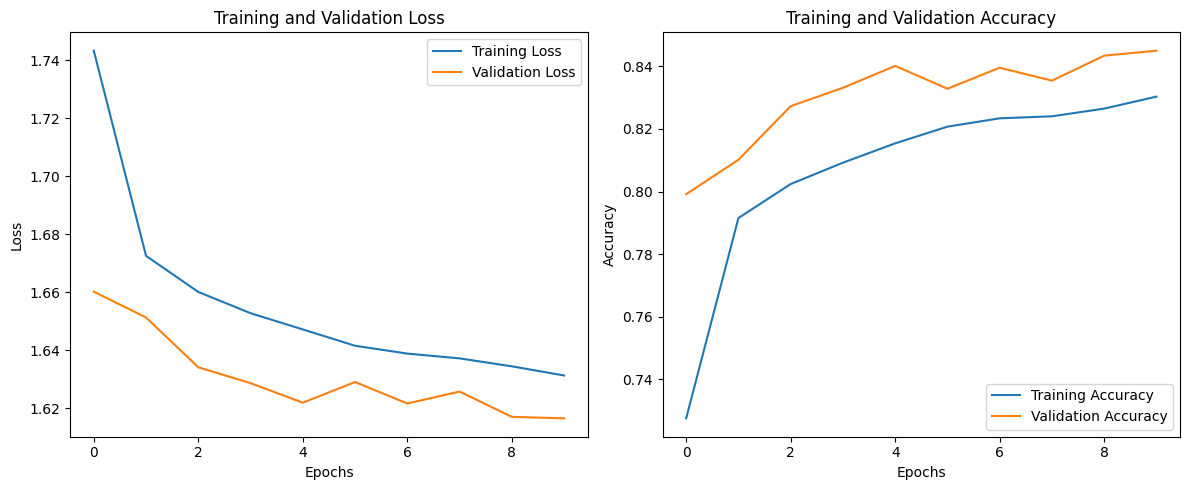

In [25]:
# Plotting the Training and Validation Loss and Accuracy
epochs_range = range(num_epochs)

# Loss plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

## Evaluating the Model

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation
final_model.eval()
test_labels = []
test_preds = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Evaluating"):
        images, labels = images.to(device), labels.to(device)
        outputs = final_model(images)
        _, predicted = torch.max(outputs, 1)
        test_labels.extend(labels.cpu().numpy())
        test_preds.extend(predicted.cpu().numpy())

accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds, average='weighted')
recall = recall_score(test_labels, test_preds, average='weighted')
f1 = f1_score(test_labels, test_preds, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluating: 100%|██████████| 110/110 [00:01<00:00, 70.27it/s]


Accuracy: 0.8429
Precision: 0.8426
Recall: 0.8429
F1 Score: 0.8397


## Save the model

In [27]:
torch.save(final_model.state_dict(), 'best_model.pth')
print("Model saved as 'best_model.pth'")

Model saved as 'best_model.pth'
